In [1]:
import pandas as pd
import spacy
import networkx as nx
import re
import nltk
from nltk.stem import WordNetLemmatizer
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import matplotlib.pyplot as plt
from pyvis.network import Network
import community as community_louvain

/Users/jamesrobertson/miniforge3/envs/textnets/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [3]:
with open('labour.txt', 'r') as f:
    text_data_raw = f.readlines()

text_data = []

for i in text_data_raw:
    split = i.split('.')
    for j in split:
        if j != '\n':
            text_data.append(j)

text_data

['Thank you all for that welcome',
 ' I don’t know about you, but I found those stories, whether it’s on the screens on the videos or in person here, incredibly compelling and incredibly moving',
 ' Each of them stories about change',
 'And Nathaniel, I don’t know how you do it',
 ' I don’t know how you’re able to hold yourself together with that poise and with that dignity and to cling on to that hope for other people',
 ' It’s really inspirational for all of us, thank you for coming',
 ' What Nathaniel didn’t tell you, he ran the marathon, playing a trombone',
 ' He’s a music teacher',
 'And Rob, thank you for your story, your contribution about housing and the importance of a home, the basic security',
 ' A base camp from where people can build their lives, it makes such a difference',
 ' It certainly did for me',
 'And Haruna, yours is a story about change',
 ' To change from one political party to another is a very big thing to do, it’s about change',
 'We changed the Labour Party

In [ ]:
NER = spacy.load("en_core_web_sm")
nltk.download('wordnet')

In [30]:
sentences = []
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))
G = nx.Graph()

for sent in text_data:
    sent = re.sub(r"[^\w\s]", '', sent)
    sent = word_tokenize(sent)
    sent = [w.lower() for w in sent if not w.lower() in stop_words]
    doc = NER(' '.join(sent))
    sent = [token.text for token in doc if token.pos_ == "NOUN"]
    sent = [lemmatizer.lemmatize(w) for w in sent]
    sent = [w for w in sent if w != 'thats' and w != 'theyre']
    sentences.append(sent)
    for i in range(len(sent)):
        try:
            G.add_edge(sent[i], sent[i+1], weight=3)
            G.add_edge(sent[i], sent[i+2], weight=2)
            G.add_edge(sent[i], sent[i+3], weight=1)
        except:
            pass
    
print(sentences)

[[], ['story', 'screen', 'video', 'person'], ['story'], [], ['poise', 'dignity', 'cling', 'hope', 'people'], [], ['marathon', 'trombone'], ['music', 'teacher'], ['thank', 'story', 'contribution', 'housing', 'importance', 'security'], ['base', 'camp', 'people', 'life', 'difference'], [], ['story', 'change'], ['party', 'thing', 'change'], ['labour', 'party', 'service', 'people'], ['opportunity', 'change', 'country', 'country', 'service', 'people'], ['gimmick'], ['fix', 'mess', 'tory', 'country'], ['labour', 'party', 'plan'], ['ambition', 'country', 'ambition', 'step'], ['step', 'growth', 'foot', 'border', 'bill', 'street', 'opportunity', 'child'], ['country', 'year', 'failure', 'round', 'circle'], ['chaos', 'division', 'feeding', 'chaos', 'division'], ['cost'], ['fireman'], ['coffee'], ['dream', 'aspiration'], [], [], ['house', 'roof', 'head'], ['fireman', 'job', 'damage', 'government'], ['wit', 'end'], ['government'], ['price'], [], ['hospital', 'childrens', 'hospital', 'liverpool', 'br

No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.
/Users/jamesrobertson/miniforge3/envs/textnets/lib/python3.10/site-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


0.34255222063891744


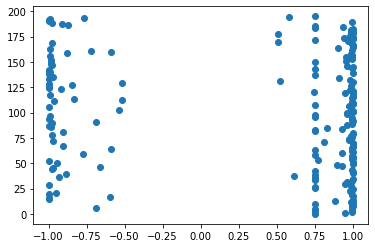

In [16]:
from transformers import pipeline
sentiment_pipeline = pipeline("sentiment-analysis")
labour_sent = []

for i in sentences:
    sentiment = sentiment_pipeline(' '.join(i))[0]
    if sentiment['label'] == "NEGATIVE":
        labour_sent.append(-1*sentiment['score'])
    else:
        labour_sent.append(sentiment['score'])

plt.scatter(labour_sent, range(len(labour_sent)))

print(sum(labour_sent) / len(labour_sent))

(array([199.,  13.,   7.,   1.,   1.,   1.,   0.,   0.,   0.,   2.]),
 array([0.        , 0.02307415, 0.04614829, 0.06922244, 0.09229658,
        0.11537073, 0.13844487, 0.16151902, 0.18459317, 0.20766731,
        0.23074146]),
 <BarContainer object of 10 artists>)

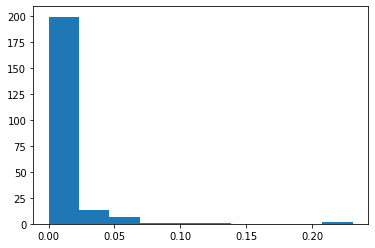

In [6]:
plt.hist(nx.centrality.betweenness_centrality(G).values())

In [33]:
betweenness_dict = nx.betweenness_centrality(G)
betweenness_df = pd.DataFrame.from_dict(
    betweenness_dict, orient="index", columns=['betweenness'])
betweenness_df.sort_values('betweenness', ascending=False)[:10]

,betweenness
child,0.230741
people,0.228705
country,0.133148
plan,0.100998
government,0.082843
change,0.066346
story,0.060690
labour,0.056651
power,0.052328
street,0.049196


In [34]:
closeness_dict = nx.closeness_centrality(G)
closeness_df = pd.DataFrame.from_dict(
    closeness_dict, orient="index", columns=['centrality'])
closeness_df.sort_values('centrality', ascending=False)[:10]

,centrality
people,0.393295
child,0.374048
country,0.358050
party,0.355876
government,0.341364
plan,0.336787
labour,0.335501
bill,0.334226
opportunity,0.330456
change,0.330456


In [36]:
closeness_dict = nx.degree_centrality(G)
closeness_df = pd.DataFrame.from_dict(
    closeness_dict, orient="index", columns=['centrality'])
closeness_df.sort_values('centrality', ascending=False)[:10]

,centrality
people,0.165919
country,0.143498
child,0.121076
government,0.098655
power,0.085202
change,0.080717
story,0.071749
plan,0.071749
year,0.067265
step,0.067265


In [31]:
from pyvis.network import Network
net = Network(width="1200px", height="1000px",
              bgcolor='#222222', font_color='white')

node_degree = dict(G.degree)
betweenness_dict = nx.betweenness_centrality(G)
degree_dict = nx.degree_centrality(G)

# Setting up node size attribute
nx.set_node_attributes(G, node_degree, 'size')
nx.set_node_attributes(G, degree_dict, 'degree_centrality')
nx.set_node_attributes(G, betweenness_dict, 'betweenness_centrality')

net.from_nx(G)
net.toggle_physics(True)
net.show("labour.html")

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


In [37]:
import community as community_louvain
communities = community_louvain.best_partition(G)
nx.set_node_attributes(G, communities, 'group')
node_degree = dict(G.degree)
betweenness_dict = nx.betweenness_centrality(G)
degree_dict = nx.degree_centrality(G)

# Setting up node size attribute
nx.set_node_attributes(G, node_degree, 'size')
nx.set_node_attributes(G, degree_dict, 'degree_centrality')
nx.set_node_attributes(G, betweenness_dict, 'betweenness_centrality')



com_net = Network(notebook=True, width="1200px", height="1000px",
                  bgcolor='#222222', font_color='white')


com_net.from_nx(G)
com_net.toggle_physics(True)
com_net.show("labour_communities.html")